In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data



Data Loading & inspection

In [10]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing values

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Handling Missing Data

In [15]:
df["Cabin"] = df["Cabin"].fillna("Unknown")



In [24]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [20]:
df = df.dropna(subset=["Embarked"])



In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

🔹 Titanic Survival Analysis

Overall survival rate in the dataset

In [28]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100
survival_rate = survival_rate.rename({0: 'Not Survived', 1: 'Survived'})
survival_rate


Survived
Not Survived    61.616162
Survived        38.383838
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Overall Survival Rate on the Titanic')

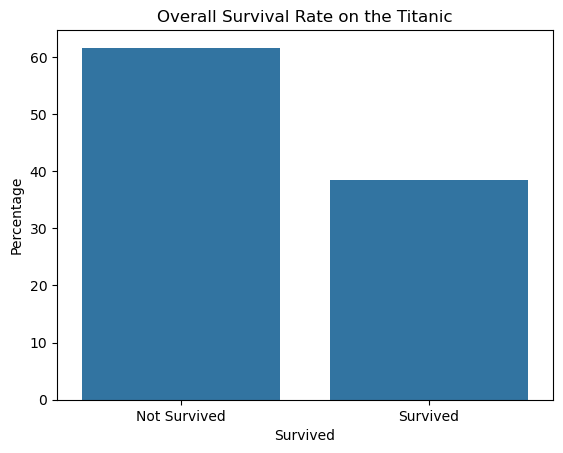

In [29]:
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.title('Overall Survival Rate on the Titanic')

Survival rate by gender

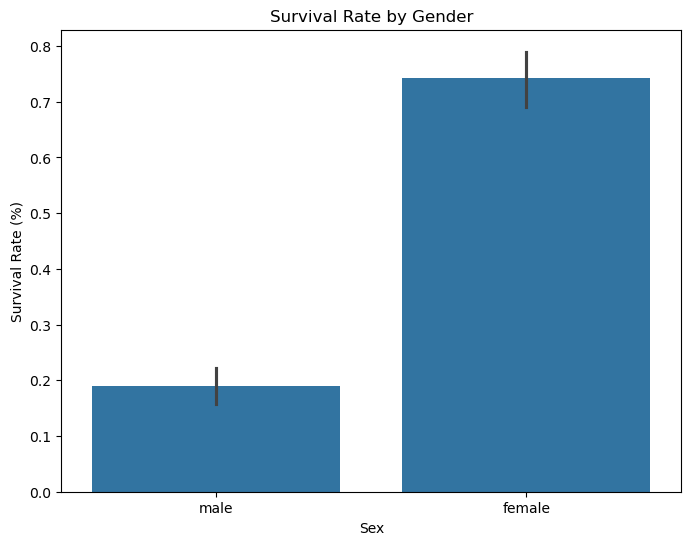


Survival Statistics by Gender:
        count  sum      mean  survival_rate
Sex                                        
female    314  233  0.742038      74.203822
male      577  109  0.188908      18.890815


In [66]:
# Create a bar plot showing survival by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Survived', estimator=np.mean)  # ✅ use mean
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

# Print detailed statistics
gender_survival = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
gender_survival['survival_rate'] = gender_survival['mean'] * 100
print("\nSurvival Statistics by Gender:")
print(gender_survival)

Passenger class (Pclass) that had the highest survival rate

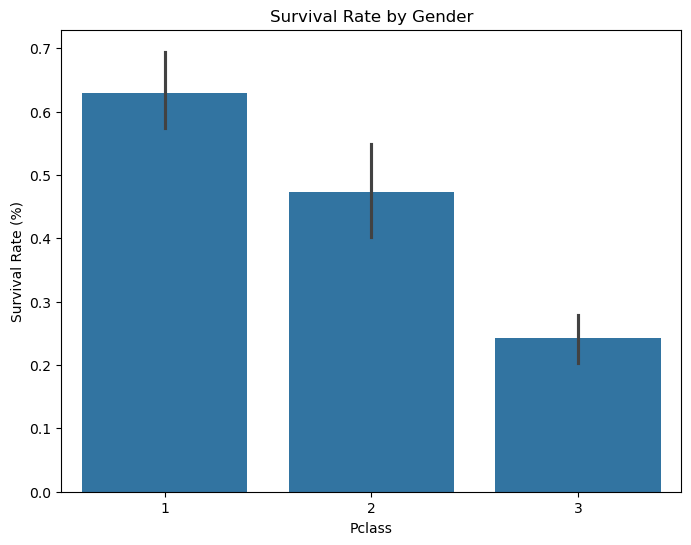

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Survived', estimator=np.mean)  # ✅ use mean
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

In [69]:
Pclass_survival = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
Pclass_survival['survival_rate'] = Pclass_survival['mean'] * 100
print("\nSurvival Statistics by Pclass:")
print(Pclass_survival)


Survival Statistics by Pclass:
        count  sum      mean  survival_rate
Pclass                                     
1         216  136  0.629630      62.962963
2         184   87  0.472826      47.282609
3         491  119  0.242363      24.236253


Average age of survivors vs non-survivors

In [73]:
average_age = df.groupby('Survived')['Age'].mean().rename({0: 'Not Survived', 1: 'Survived'})
print("\nAverage Age of Survivors vs Non-Survivors:")   
print(average_age)


Average Age of Survivors vs Non-Survivors:
Survived
Not Survived    30.028233
Survived        28.291433
Name: Age, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_20612\2203779183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Survived", y="Age", palette="pastel")


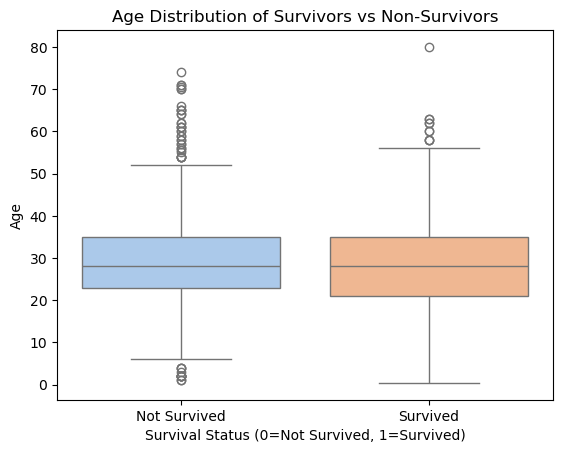

In [97]:
sns.boxplot(data=df, x="Survived", y="Age", palette="pastel")
plt.xlabel('Survival Status (0=Not Survived, 1=Survived)')
plt.ylabel('Age')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()


Did children (<16 years) have better survival chances than adults?

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [83]:
ChildGroup = df[df['Age'] < 16].value_counts('Survived', normalize=True) * 100
ChildGroup = ChildGroup.rename({0: 'Not Survived', 1: 'Survived'})
ChildGroup

Survived
Survived        59.036145
Not Survived    40.963855
Name: proportion, dtype: float64

<Axes: xlabel='Survived'>

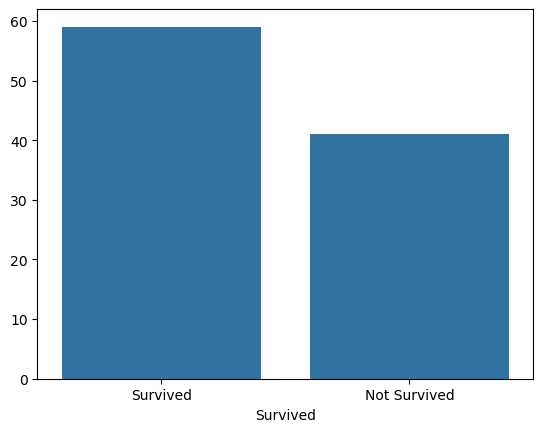

In [85]:
sns.barplot(x=ChildGroup.index, y=ChildGroup.values)

In [84]:
AdultGroup = df[df['Age'] >= 16].value_counts('Survived', normalize=True) * 100
AdultGroup = AdultGroup.rename({0: 'Not Survived', 1: 'Survived'})
AdultGroup


Survived
Not Survived    63.737624
Survived        36.262376
Name: proportion, dtype: float64

Text(0, 0.5, 'Percentage')

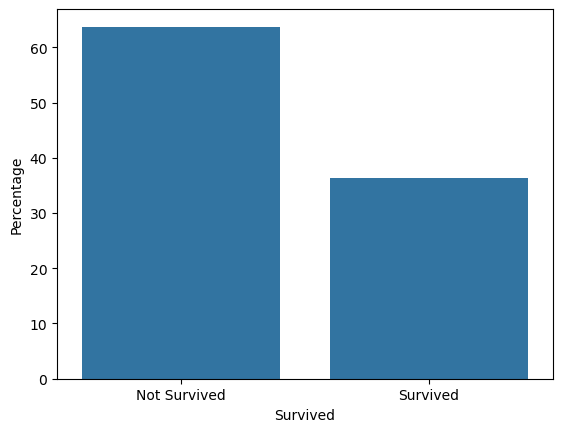

In [91]:
sns.barplot(x=AdultGroup.index, y=AdultGroup.values)
plt.xlabel('Survived')  
plt.ylabel('Percentage')


Is there a relationship between Fare paid and survival?

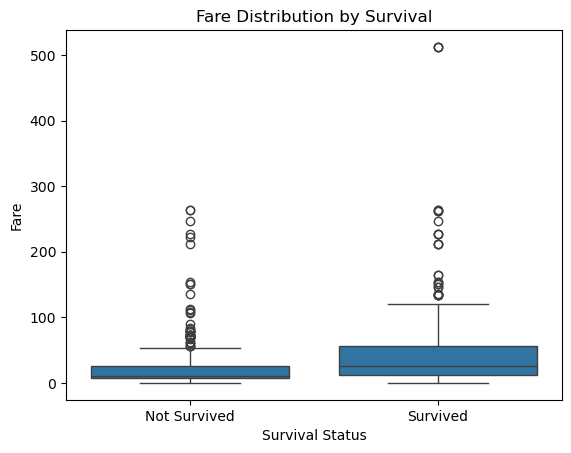

In [96]:
df['Survived'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})

sns.boxplot(x='Survived', y='Fare', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival')
plt.show()


Does the port of embarkation (Embarked) affect survival?

In [106]:
# Calculate survival rates by port
embarked_survival = df.groupby('Embarked')['Survived'].value_counts(normalize=True) * 100
print("Survival rates by port of embarkation:")
print(embarked_survival)



Survival rates by port of embarkation:
Embarked  Survived    
C         Survived        55.357143
          Not Survived    44.642857
Q         Not Survived    61.038961
          Survived        38.961039
S         Not Survived    66.099071
          Survived        33.900929
Name: proportion, dtype: float64


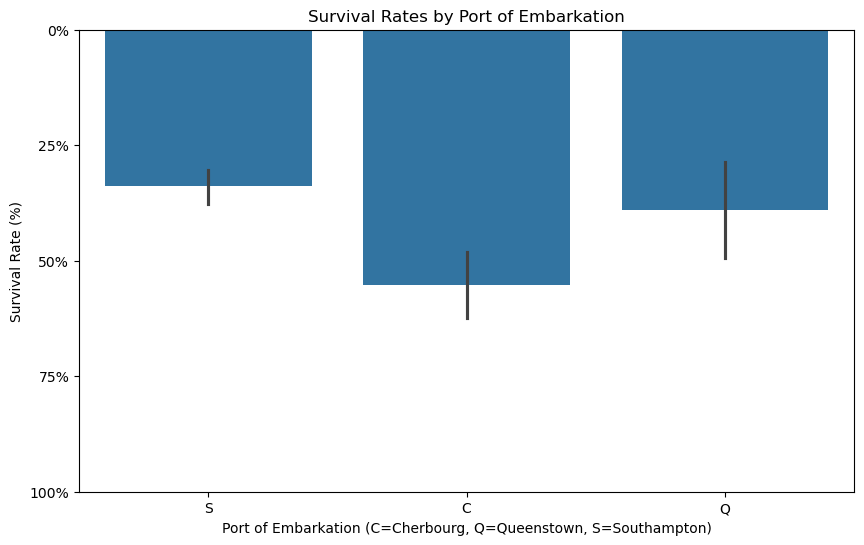

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Embarked', y='Survived', estimator=lambda x: np.mean(x) * 100)

plt.title('Survival Rates by Port of Embarkation')
plt.xlabel('Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Survival Rate (%)')

# Replace y-axis tick labels (0 → "Not Survived", 100 → "Survived")
plt.yticks([0, 25, 50, 75, 100], [f"{i}%" for i in [0,25,50,75,100]])

plt.show()


What is the distribution of age across different classes (Pclass)?

In [115]:
age_distribution = df.groupby('Pclass')['Age'].value_counts(normalize=True) * 100
age_distribution = age_distribution.rename('Percentage').reset_index()
age_distribution


,Pclass,Age,Percentage
0,1,28.0,15.740741
1,1,35.0,4.166667
2,1,36.0,4.166667
3,1,24.0,3.240741
4,1,30.0,2.777778
...,...,...,...
177,3,61.0,0.203666
178,3,63.0,0.203666
179,3,65.0,0.203666
180,3,70.5,0.203666


C:\Users\Admin\AppData\Local\Temp\ipykernel_20612\322618107.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Age', data=df, palette='pastel')


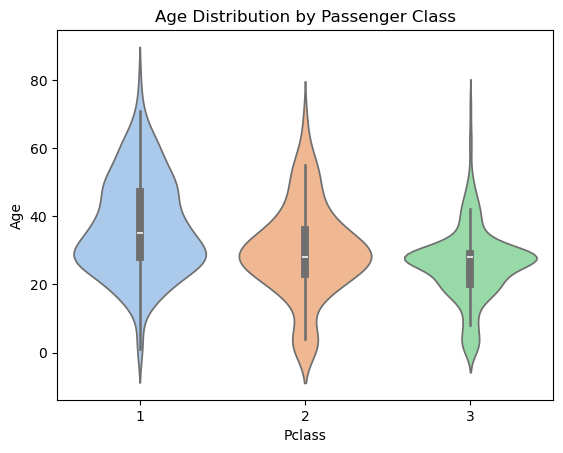

In [116]:
sns.violinplot(x='Pclass', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Passenger Class')
plt.show()